In [3]:
# Import required libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt


In [4]:
# Function to initialize the browser using Splinter
def init_browser():
    from splinter import Browser
    from webdriver_manager.chrome import ChromeDriverManager
    from selenium.webdriver.chrome.service import Service
    from selenium.webdriver.chrome.options import Options
    
    # Setup ChromeDriver
    service = Service(executable_path=ChromeDriverManager().install())
    options = Options()
    options.headless = True  # Set to True for non-interactive mode
    return Browser('chrome', service=service, options=options)


In [5]:
# Function to scrape Mars weather data
def scrape_mars_weather():
    """
    Scrapes Mars weather data from the provided URL and returns a DataFrame.
    """
    browser = init_browser()
    url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
    browser.visit(url)
    
    # Use BeautifulSoup to parse HTML
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    
    # Extract table
    table = soup.find('table')
    browser.quit()
    
    # Convert HTML table to DataFrame
    return pd.read_html(str(table))[0]

In [6]:
# Function to prepare and clean data
def prepare_data(df):
    """
    Prepares and cleans the weather data DataFrame.
    """
    df.columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
    df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
    df['sol'] = df['sol'].astype(int)
    df['min_temp'] = df['min_temp'].astype(float)
    df['pressure'] = df['pressure'].astype(float)
    return df

In [7]:
# Function to perform analysis
def analyze_data(df):
    """
    Analyzes the DataFrame to answer specified questions.
    """
    # Number of Martian months in the dataset
    num_months = df['month'].nunique()
    # Number of Martian days (sols) in the dataset
    num_sols = df['sol'].count()
    
    # Average minimum temperature by month
    avg_min_temp = df.groupby('month')['min_temp'].mean()
    # Average pressure by month
    avg_pressure = df.groupby('month')['pressure'].mean()
    
    # Plotting the average minimum temperature by month
    avg_min_temp.plot(kind='bar', color='blue', title='Average Min Temp by Month')
    plt.xlabel('Month')
    plt.ylabel('Temperature (Celsius)')
    plt.show()
    
    # Plotting the average pressure by month
    avg_pressure.plot(kind='bar', color='red', title='Average Pressure by Month')
    plt.xlabel('Month')
    plt.ylabel('Pressure (Pa)')
    plt.show()
    
    return num_months, num_sols, avg_min_temp.idxmin(), avg_min_temp.idxmax(), avg_pressure.idxmin(), avg_pressure.idxmax()


In [8]:
# Main function to control flow
def main():
    # Scrape the data
    mars_weather = scrape_mars_weather()
    # Clean the data
    mars_weather = prepare_data(mars_weather)
    # Analyze the data
    results = analyze_data(mars_weather)
    print(f"Number of Martian months: {results[0]}")
    print(f"Number of Martian sols: {results[1]}")
    print(f"Coldest month: {results[2]}")
    print(f"Warmest month: {results[3]}")
    print(f"Month with lowest pressure: {results[4]}")
    print(f"Month with highest pressure: {results[5]}")
    # Save data to CSV
    mars_weather.to_csv('mars_weather.csv', index=False)

C:\Users\Jonathan Gonzalez\AppData\Local\Temp\ipykernel_34396\2718967402.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  return pd.read_html(str(table))[0]


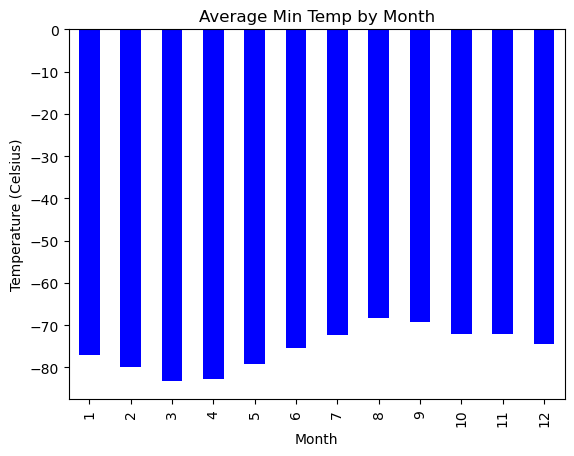

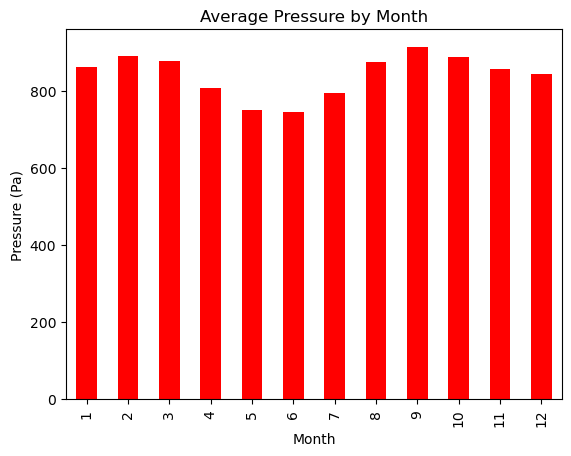

Number of Martian months: 12
Number of Martian sols: 1867
Coldest month: 3
Warmest month: 8
Month with lowest pressure: 6
Month with highest pressure: 9


In [9]:
# Ensure the script runs only if executed as the main program
if __name__ == "__main__":
    main()